# Data Analysis

In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as scipy
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [2]:
#read csv file
df = pd.read_csv("Dataset of Diabetes .csv")
print(df.head())

    ID  No_Pation Gender  AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL  \
0  502      17975      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
1  735      34221      M   26   4.5  62    4.9   3.7  1.4  1.1  2.1   0.6   
2  420      47975      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
3  680      87656      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
4  504      34223      M   33   7.1  46    4.9   4.9  1.0  0.8  2.0   0.4   

    BMI CLASS  
0  24.0     N  
1  23.0     N  
2  24.0     N  
3  24.0     N  
4  21.0     N  


In [3]:
#check for null values
null_value = df.isnull().sum()
print("Diabetes Dataset:\n",null_value)

Diabetes Dataset:
 ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64


In [4]:
# Remove duplicated rows of data
print("Dataset of Diabetes")
print("Number of duplicated rows: ", df.duplicated().sum())
df = df.drop_duplicates()
print("Number of duplicated rows (After Dropping Duplicated Rows): ", df.duplicated().sum())


Dataset of Diabetes
Number of duplicated rows:  0
Number of duplicated rows (After Dropping Duplicated Rows):  0


In [5]:
# Change column "GENDER" value M to 0 and F to 1
df["Gender"] = df["Gender"].replace({"M": 0, "F": 1})

# Change column "CLASS" value N to 0, Y to 1 and P to 2
df["CLASS"] = df["CLASS"].str.strip().replace({"N": 0, "Y": 1, "P": 2})


In [6]:
df.info()
print(df['CLASS'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   object 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   int64  
dtypes: float64(8), int64(5), object(1)
memory usage: 117.2+ KB
0      0
1      0
2      0
3      0
4      0
      ..
995    1
996    1
997    1
998    1
999    1
Name: CLASS, Length: 1000, dtype: int64


['ID', 'No_Pation', 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI', 'CLASS']


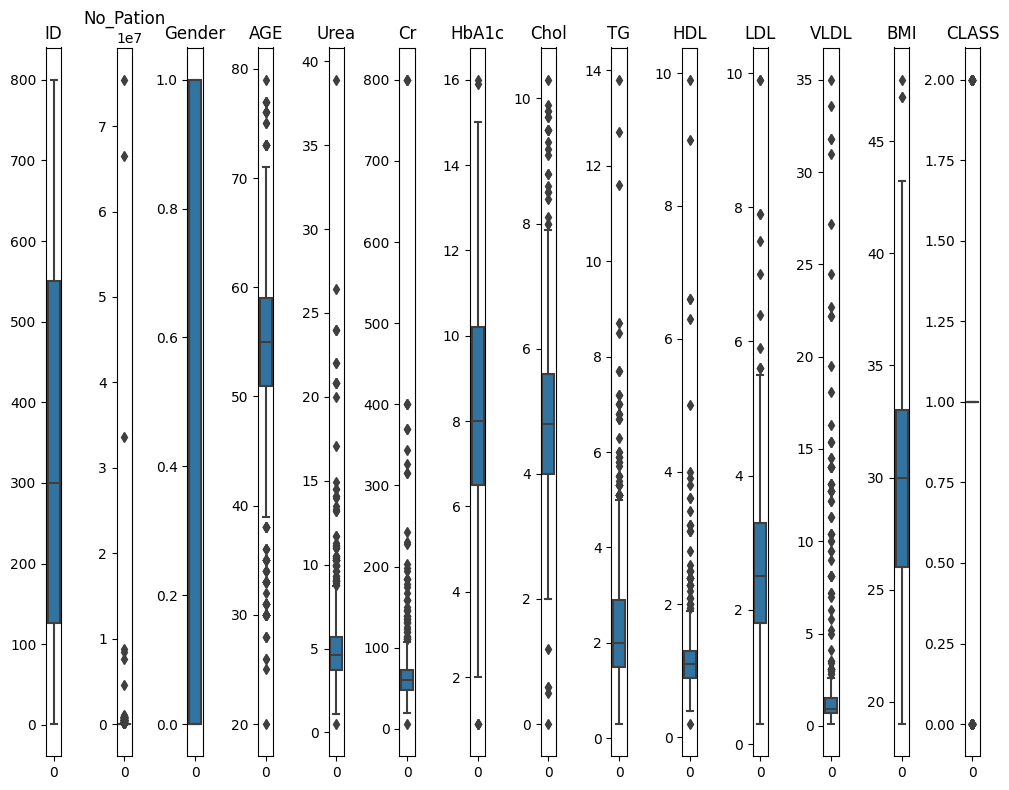

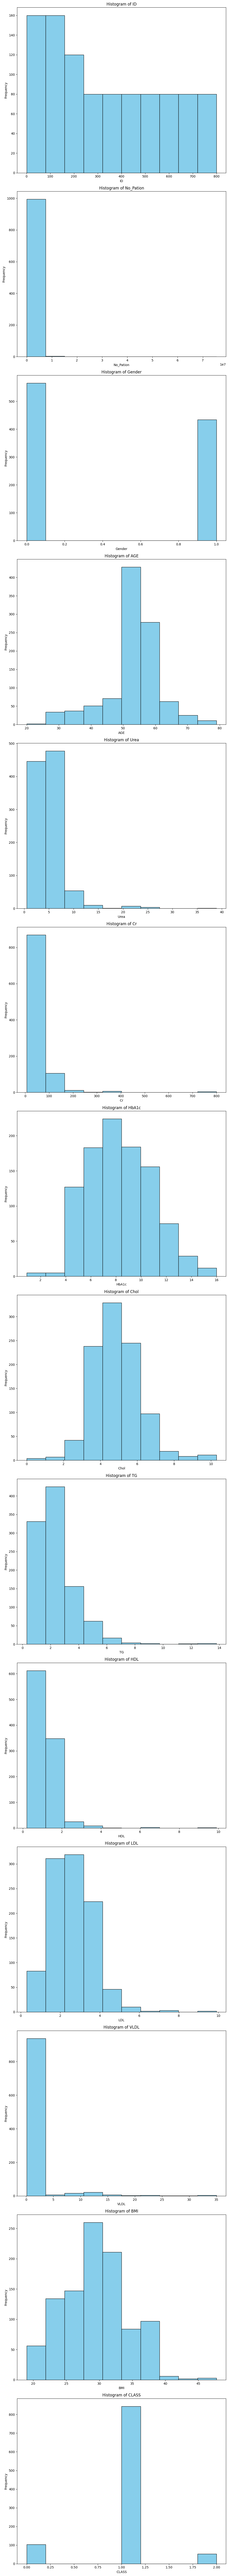

In [7]:
# Convert columns to numeric data types
df['ID'] = pd.to_numeric(df['ID'], errors='coerce')
df['No_Pation'] = pd.to_numeric(df['No_Pation'], errors='coerce')
df['Gender'] = pd.to_numeric(df['Gender'], errors='coerce')
df['AGE'] = pd.to_numeric(df['AGE'], errors='coerce')
df['Urea'] = pd.to_numeric(df['Urea'], errors='coerce')
df['Cr'] = pd.to_numeric(df['Cr'], errors='coerce')
df['HbA1c'] = pd.to_numeric(df['HbA1c'], errors='coerce')
df['Chol'] = pd.to_numeric(df['Chol'], errors='coerce')
df['TG'] = pd.to_numeric(df['TG'], errors='coerce')
df['HDL'] = pd.to_numeric(df['HDL'], errors='coerce')
df['LDL'] = pd.to_numeric(df['LDL'], errors='coerce')
df['VLDL'] = pd.to_numeric(df['VLDL'], errors='coerce')
df['BMI'] = pd.to_numeric(df['BMI'], errors='coerce')
df['CLASS'] = pd.to_numeric(df['CLASS'], errors='coerce')

# List all the columns with numerical values
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
print(numeric_cols)

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=len(numeric_cols), figsize=(10, 8))

# Plot boxplots
for i, col in enumerate(numeric_cols): 
    sns.boxplot(df[col], ax=axes[i])
    axes[i].set_title(col)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

# Specify the numeric columns for histograms
numeric_features = ['ID', 'No_Pation','Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI', 'CLASS']

# Create subplots
fig, axes = plt.subplots(nrows=len(numeric_features), ncols=1, figsize=(10, 8*len(numeric_features)))

# Plot histograms for each feature
for i, feature in enumerate(numeric_features):
    ax = axes[i]
    ax.hist(df[feature].dropna(), bins=10, color='skyblue', edgecolor='black')
    ax.set_title(f'Histogram of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


In [8]:
#let's check the skewness, Usually, we'll check only the continuous value feature, that's why we only include float data type
flt_columns = list(df.select_dtypes(include=["float64"]).columns)

skewness = {}
for col in flt_columns: 
    skewness[col] = scipy.stats.mstats.skew(df[col])
pd.DataFrame(skewness, index=["Skewness of Diabetes"]).transpose()

,Skewness of Diabetes
Gender,NaN
Urea,4.292477
HbA1c,0.221357
Chol,0.616197
TG,2.295007
HDL,6.273773
LDL,1.144190
VLDL,5.342416
BMI,0.125618


here, we can see that UREA, HDL, VLDL are extremely positive skewed

In [9]:
import scipy.stats as stats

kurtosis = {}
for col in flt_columns:
    kurtosis[col] = stats.kurtosistest(df[col].values)

print("Kurtosis Test of Diabetes:\n")

for n, v in kurtosis.items():
    print(n, v)


Kurtosis Test of Diabetes:

Gender KurtosistestResult(statistic=nan, pvalue=nan)
Urea KurtosistestResult(statistic=17.460404161385302, pvalue=2.868957931058207e-68)
HbA1c KurtosistestResult(statistic=-1.796377480068271, pvalue=0.07243450293636014)
Chol KurtosistestResult(statistic=6.869578434983152, pvalue=6.439190574901863e-12)
TG KurtosistestResult(statistic=13.727095914361568, pvalue=6.987875333129034e-43)
HDL KurtosistestResult(statistic=19.41015906045422, pvalue=6.333073271242442e-84)
LDL KurtosistestResult(statistic=10.153406985300471, pvalue=3.199931645712849e-24)
VLDL KurtosistestResult(statistic=17.745254317704912, pvalue=1.8754915663545832e-70)
BMI KurtosistestResult(statistic=-2.1943710297139263, pvalue=0.028208746847129502)


In [10]:
#Matrix of pearsons correlations. Please note that only continous attributes 
#are included in the correlation measures (eg, did not id, no pation, gender, age, class ). 
df_corr_data = df
cm = df_corr_data.corr()
cm

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
ID,1.000000,0.064920,-0.017394,-0.065980,-0.094434,-0.102457,-0.007571,0.044390,-0.055908,0.026231,-0.064305,0.146142,0.049409,0.000914
No_Pation,0.064920,1.000000,-0.051739,-0.088006,-0.019160,0.000692,-0.032057,-0.030171,-0.039885,-0.013357,-0.003171,0.113754,0.017719,-0.050682
Gender,-0.017394,-0.051739,1.000000,-0.021691,-0.115995,-0.154332,0.006853,0.064339,-0.051541,0.129554,-0.055106,-0.193896,-0.072948,-0.130230
AGE,-0.065980,-0.088006,-0.021691,1.000000,0.105092,0.054941,0.379136,0.036649,0.148204,-0.020038,0.016105,-0.087903,0.375956,0.120265
Urea,-0.094434,-0.019160,-0.115995,0.105092,1.000000,0.624134,-0.023603,0.001852,0.040980,-0.036994,-0.007301,-0.011191,0.045618,0.011517
Cr,-0.102457,0.000692,-0.154332,0.054941,0.624134,1.000000,-0.037412,-0.007097,0.056579,-0.023804,0.039479,0.009615,0.054746,0.020483
HbA1c,-0.007571,-0.032057,0.006853,0.379136,-0.023603,-0.037412,1.000000,0.177489,0.218556,0.028933,0.011057,0.073462,0.413350,0.264595
Chol,0.044390,-0.030171,0.064339,0.036649,0.001852,-0.007097,0.177489,1.000000,0.321789,0.103814,0.416665,0.076294,0.013678,0.090516
TG,-0.055908,-0.039885,-0.051541,0.148204,0.040980,0.056579,0.218556,0.321789,1.000000,-0.083001,0.015378,0.144570,0.110757,0.114418
HDL,0.026231,-0.013357,0.129554,-0.020038,-0.036994,-0.023804,0.028933,0.103814,-0.083001,1.000000,-0.142079,-0.059275,0.072409,-0.024796


In [11]:
#Significance (eg, p-value) of the pearson correlations. 
pr = df_corr_data.corr(method = lambda x, y: pearsonr(x, y)[1])
pr_sig = pr[lambda x: x <= 0.05]
pr_sig

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
ID,NaN,0.040116,NaN,3.696513e-02,2.797050e-03,1.176671e-03,NaN,NaN,NaN,NaN,4.204561e-02,3.474731e-06,NaN,NaN
No_Pation,0.040116,NaN,NaN,5.354231e-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.128461e-04,NaN,NaN
Gender,NaN,NaN,NaN,NaN,2.387112e-04,9.522971e-07,NaN,4.204080e-02,NaN,0.000040,NaN,6.429859e-10,2.111828e-02,3.649628e-05
AGE,0.036965,0.005354,NaN,NaN,8.735707e-04,NaN,1.548865e-35,NaN,2.516538e-06,NaN,NaN,5.408466e-03,6.318181e-35,1.377430e-04
Urea,0.002797,NaN,2.387112e-04,8.735707e-04,NaN,4.447327e-109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cr,0.001177,NaN,9.522971e-07,NaN,4.447327e-109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HbA1c,NaN,NaN,NaN,1.548865e-35,NaN,NaN,NaN,1.598870e-08,2.801174e-12,NaN,NaN,2.016218e-02,1.512381e-42,1.756593e-17
Chol,NaN,NaN,4.204080e-02,NaN,NaN,NaN,1.598870e-08,NaN,1.592066e-25,0.001010,2.856119e-43,1.581564e-02,NaN,4.174334e-03
TG,NaN,NaN,NaN,2.516538e-06,NaN,NaN,2.801174e-12,1.592066e-25,NaN,0.008640,NaN,4.429710e-06,4.499983e-04,2.882814e-04
HDL,NaN,NaN,4.008262e-05,NaN,NaN,NaN,NaN,1.010196e-03,8.640024e-03,NaN,6.476383e-06,NaN,2.202653e-02,NaN


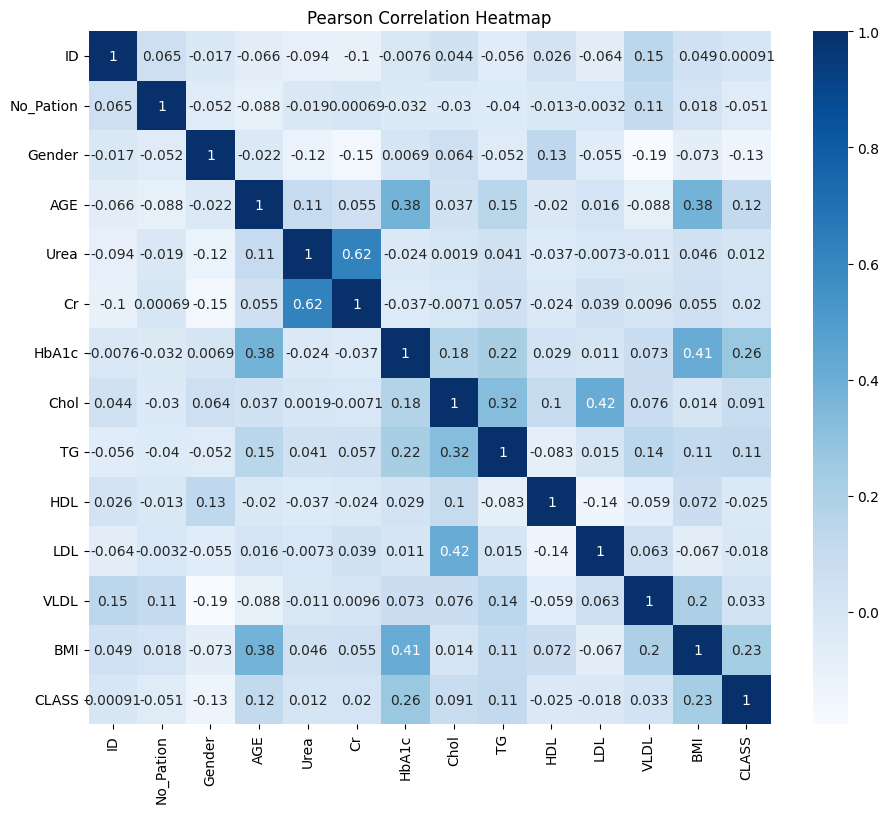

In [12]:
#Graphing the Matrix of pearsons correlation. 
fig, ax = plt.subplots(figsize=(11,9))
sns.heatmap(cm, 
           cmap="Blues",
           annot=True)
plt.title("Pearson Correlation Heatmap")
plt.show()

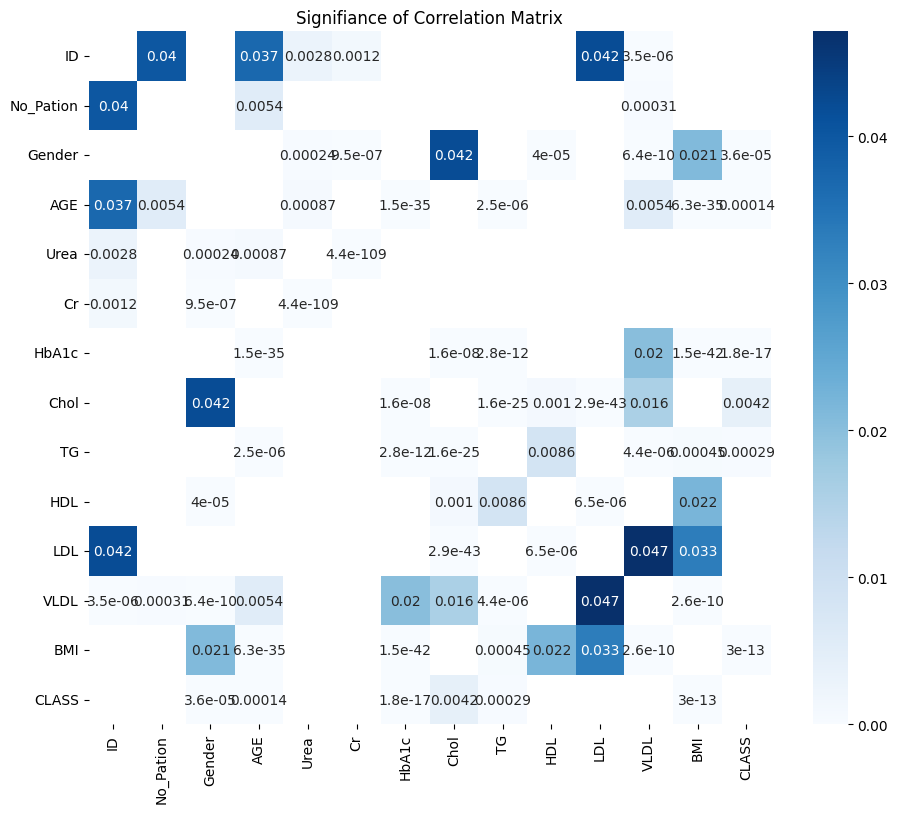

In [13]:
#Graphing the significant p-values of the correlation matrix. 
fig, ax = plt.subplots(figsize=(11,9))
sns.heatmap(pr_sig, 
           cmap="Blues",
           annot=True)
plt.title("Signifiance of Correlation Matrix")
plt.show()

We can see here, there are a few features that are highly correlated

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     999 non-null    float64
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   int64  
dtypes: float64(9), int64(5)
memory usage: 149.5 KB


# Data Normalization

In [15]:
from sklearn.preprocessing import StandardScaler

# Create a copy of the original dataset
normalized_data = df.copy()

# Drop the "CLASS" column
normalized_data = normalized_data.drop("CLASS", axis=1)

# Select the columns to normalize
columns_to_normalize = ['ID', 'No_Pation', 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI']

# Instantiate the StandardScaler
scaler = StandardScaler()

# Normalize the selected columns
normalized_data[columns_to_normalize] = scaler.fit_transform(normalized_data[columns_to_normalize])

print("Original Data:")
print(df)

print("\nNormalized Data:")
print(normalized_data)


Original Data:
      ID  No_Pation  Gender  AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL  \
0    502      17975     1.0   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
1    735      34221     0.0   26   4.5  62    4.9   3.7  1.4  1.1  2.1   0.6   
2    420      47975     1.0   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
3    680      87656     1.0   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
4    504      34223     0.0   33   7.1  46    4.9   4.9  1.0  0.8  2.0   0.4   
..   ...        ...     ...  ...   ...  ..    ...   ...  ...  ...  ...   ...   
995  200     454317     0.0   71  11.0  97    7.0   7.5  1.7  1.2  1.8   0.6   
996  671     876534     0.0   31   3.0  60   12.3   4.1  2.2  0.7  2.4  15.4   
997  669      87654     0.0   30   7.1  81    6.7   4.1  1.1  1.2  2.4   8.1   
998   99      24004     0.0   38   5.8  59    6.7   5.3  2.0  1.6  2.9  14.0   
999  248      24054     0.0   54   5.0  67    6.9   3.8  1.7  1.1  3.0   0.7   

      BMI  CLASS  
0    

#Model Development



In [16]:
X = normalized_data
y = np.ravel(df.CLASS)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score

# Impute missing values with the mean
imputer = SimpleImputer()
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Create and train the KNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_imputed, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test_imputed)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("F1-score:", f1)

Accuracy: 0.925
F1-score: 0.9261892177589851


In [23]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

# Create a SimpleImputer to impute missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Create and train the Naive Bayes model
nb = GaussianNB()
nb.fit(X_train_imputed, y_train)

# Make predictions on the test set
y_pred = nb.predict(X_test_imputed)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("F1-score: ", f1)

Accuracy: 0.935
F1-score:  0.9396911105499083
